In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
import itertools
from random import sample
import pickle
from scipy.spatial import distance
import time
import sys
from skmob.measures import evaluation

import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
#plt.rcParams["figure.figsize"] = [36.4, 15]
#plt.rcParams["figure.autolayout"] = True

from matplotlib.gridspec import GridSpec


import random
random.seed(3110)

In [2]:
with open("../TaxiNYC/v_test.txt", "rb") as fp:   # Unpickling
            test_set = pickle.load(fp)
with open("../TaxiNYC/fake_set.txt", "rb") as fp:   # Unpickling
            fake_set = pickle.load(fp)
with open("../TaxiNYC/fake_set_gravity.txt", "rb") as fp:   # Unpickling
            fake_set_gravity = pickle.load(fp)  
with open("../TaxiNYC/fake_set_radiation.txt", "rb") as fp:   # Unpickling
            fake_set_radiation = pickle.load(fp)
with open("../TaxiNYC/fake_set_random.txt", "rb") as fp:   # Unpickling
            fake_set_random = pickle.load(fp)
with open("../TaxiNYC/fake_set_random_weighted.txt", "rb") as fp:   # Unpickling
            fake_set_random_weighted = pickle.load(fp)

In [3]:
somma = 0
i_test = 0
for i,t in enumerate(test_set):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_test = i
i_test

134

In [4]:
somma = 0
i_mogan = 0
for i,t in enumerate(fake_set):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_mogan = i
i_mogan

44

In [5]:
somma = 0
i_gravity = 0
for i,t in enumerate(fake_set_gravity):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_gravity = i
i_gravity

21

In [6]:
somma = 0
i_radiation = 0
for i,t in enumerate(fake_set_radiation):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_radiation = i
i_radiation

134

In [7]:
somma = 0
i_random = 0
for i,t in enumerate(fake_set_random):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_random = i
i_random

39

In [8]:
somma = 0
i_random_weighted = 0
for i,t in enumerate(fake_set_random_weighted):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_random_weighted = i
i_random_weighted

137

In [9]:
m0 = test_set[i_test]
m1 = fake_set[i_mogan]
m2 = fake_set_gravity[i_gravity]
m3 = fake_set_radiation[i_radiation]
m4 = fake_set_random[i_random]
m5 = fake_set_random_weighted[i_random_weighted]

In [10]:
print(np.max(m2))
a = np.argmax(m2)
a

2975.0


1942

In [11]:
row = int(1941/64)
row

30

In [12]:
1941%64

21

In [13]:
m0[30,21]

2393

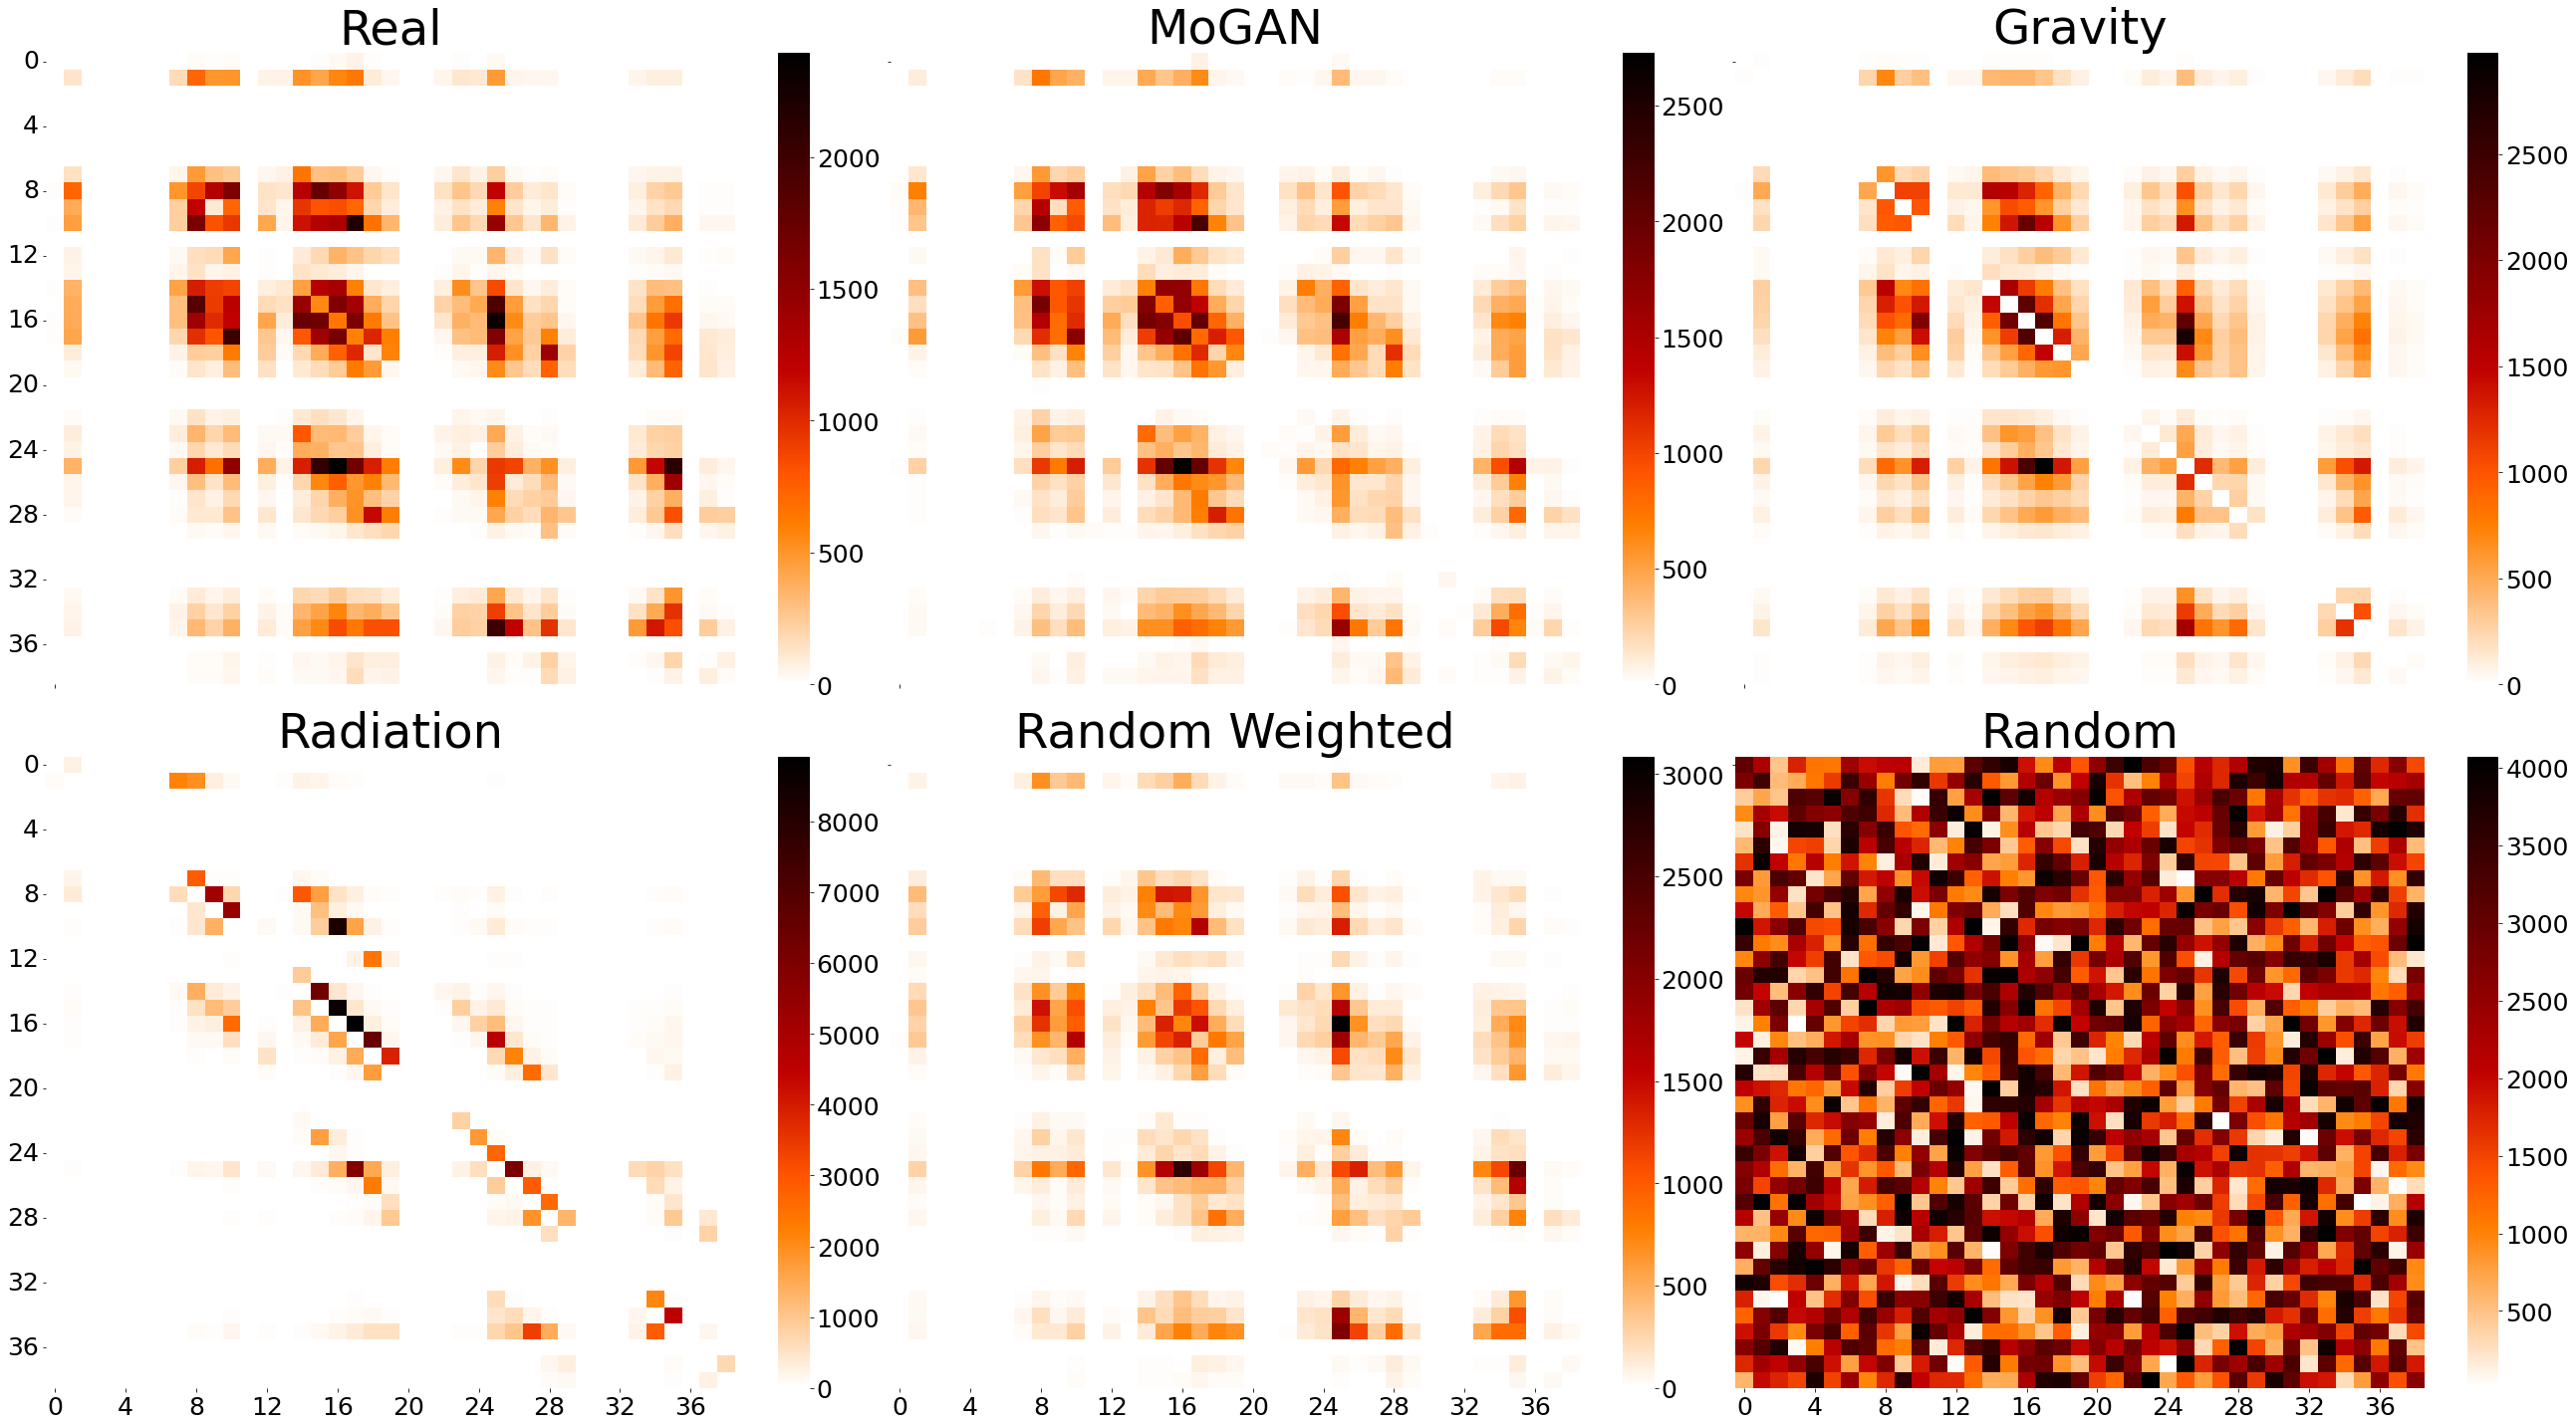

In [66]:
plt.rcParams["figure.figsize"] = [36.4, 20]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(2, 3)
fig.tight_layout()
cbar_label = 25

lw = 0.00000001
lc = "black"
lc = "#6e6464"

sns.heatmap(m0[5:44,5:44], ax=ax[0,0], cmap='gist_heat_r', xticklabels = [""], yticklabels = 4,  linecolor=lc)
ax[0,0].set_title('Real',fontsize=48)
ax[0,0].tick_params(axis='both', which='major', labelsize=25)
ax[0,0].tick_params(axis='y', rotation=0)
cbar = ax[0,0].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)


sns.heatmap(m1[5:44,5:44], ax=ax[0,1], cmap='gist_heat_r', xticklabels = [""], yticklabels = [""],  linecolor=lc)
ax[0,1].set_title('MoGAN',fontsize=48)
ax[0,1].tick_params(axis='x', which='major', labelsize=25)
cbar = ax[0,1].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)

sns.heatmap(m2[5:44,5:44], ax=ax[0,2], cmap='gist_heat_r', xticklabels = [""], yticklabels = [""],  linecolor=lc)
ax[0,2].set_title('Gravity',fontsize=48)
ax[0,2].tick_params(axis='x', which='major', labelsize=25)
cbar = ax[0,2].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)

sns.heatmap(m3[5:44,5:44], ax=ax[1,0], cmap='gist_heat_r', xticklabels = 4, yticklabels = 4,  linecolor=lc)
ax[1,0].set_title('Radiation',fontsize=48)
ax[1,0].tick_params(axis='both', which='major', labelsize=25)
ax[1,0].tick_params(axis='y', rotation=0)
cbar = ax[1,0].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)


sns.heatmap(m5[5:44,5:44], ax=ax[1,1], cmap='gist_heat_r', xticklabels = 4, yticklabels = [""],  linecolor=lc)
ax[1,1].set_title('Random Weighted',fontsize=48)
ax[1,1].tick_params(axis='x', which='major', labelsize=25)
cbar = ax[1,1].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)



sns.heatmap(m4[5:44,5:44], ax=ax[1,2], cmap='gist_heat_r', xticklabels = 4, yticklabels = [""],  linecolor=lc)
ax[1,2].set_title('Random',fontsize=48)
ax[1,2].tick_params(axis='x', which='major', labelsize=25)
cbar = ax[1,2].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)




#plt.show()

plt.savefig("viz-multiple.pdf", bbox_inches='tight')

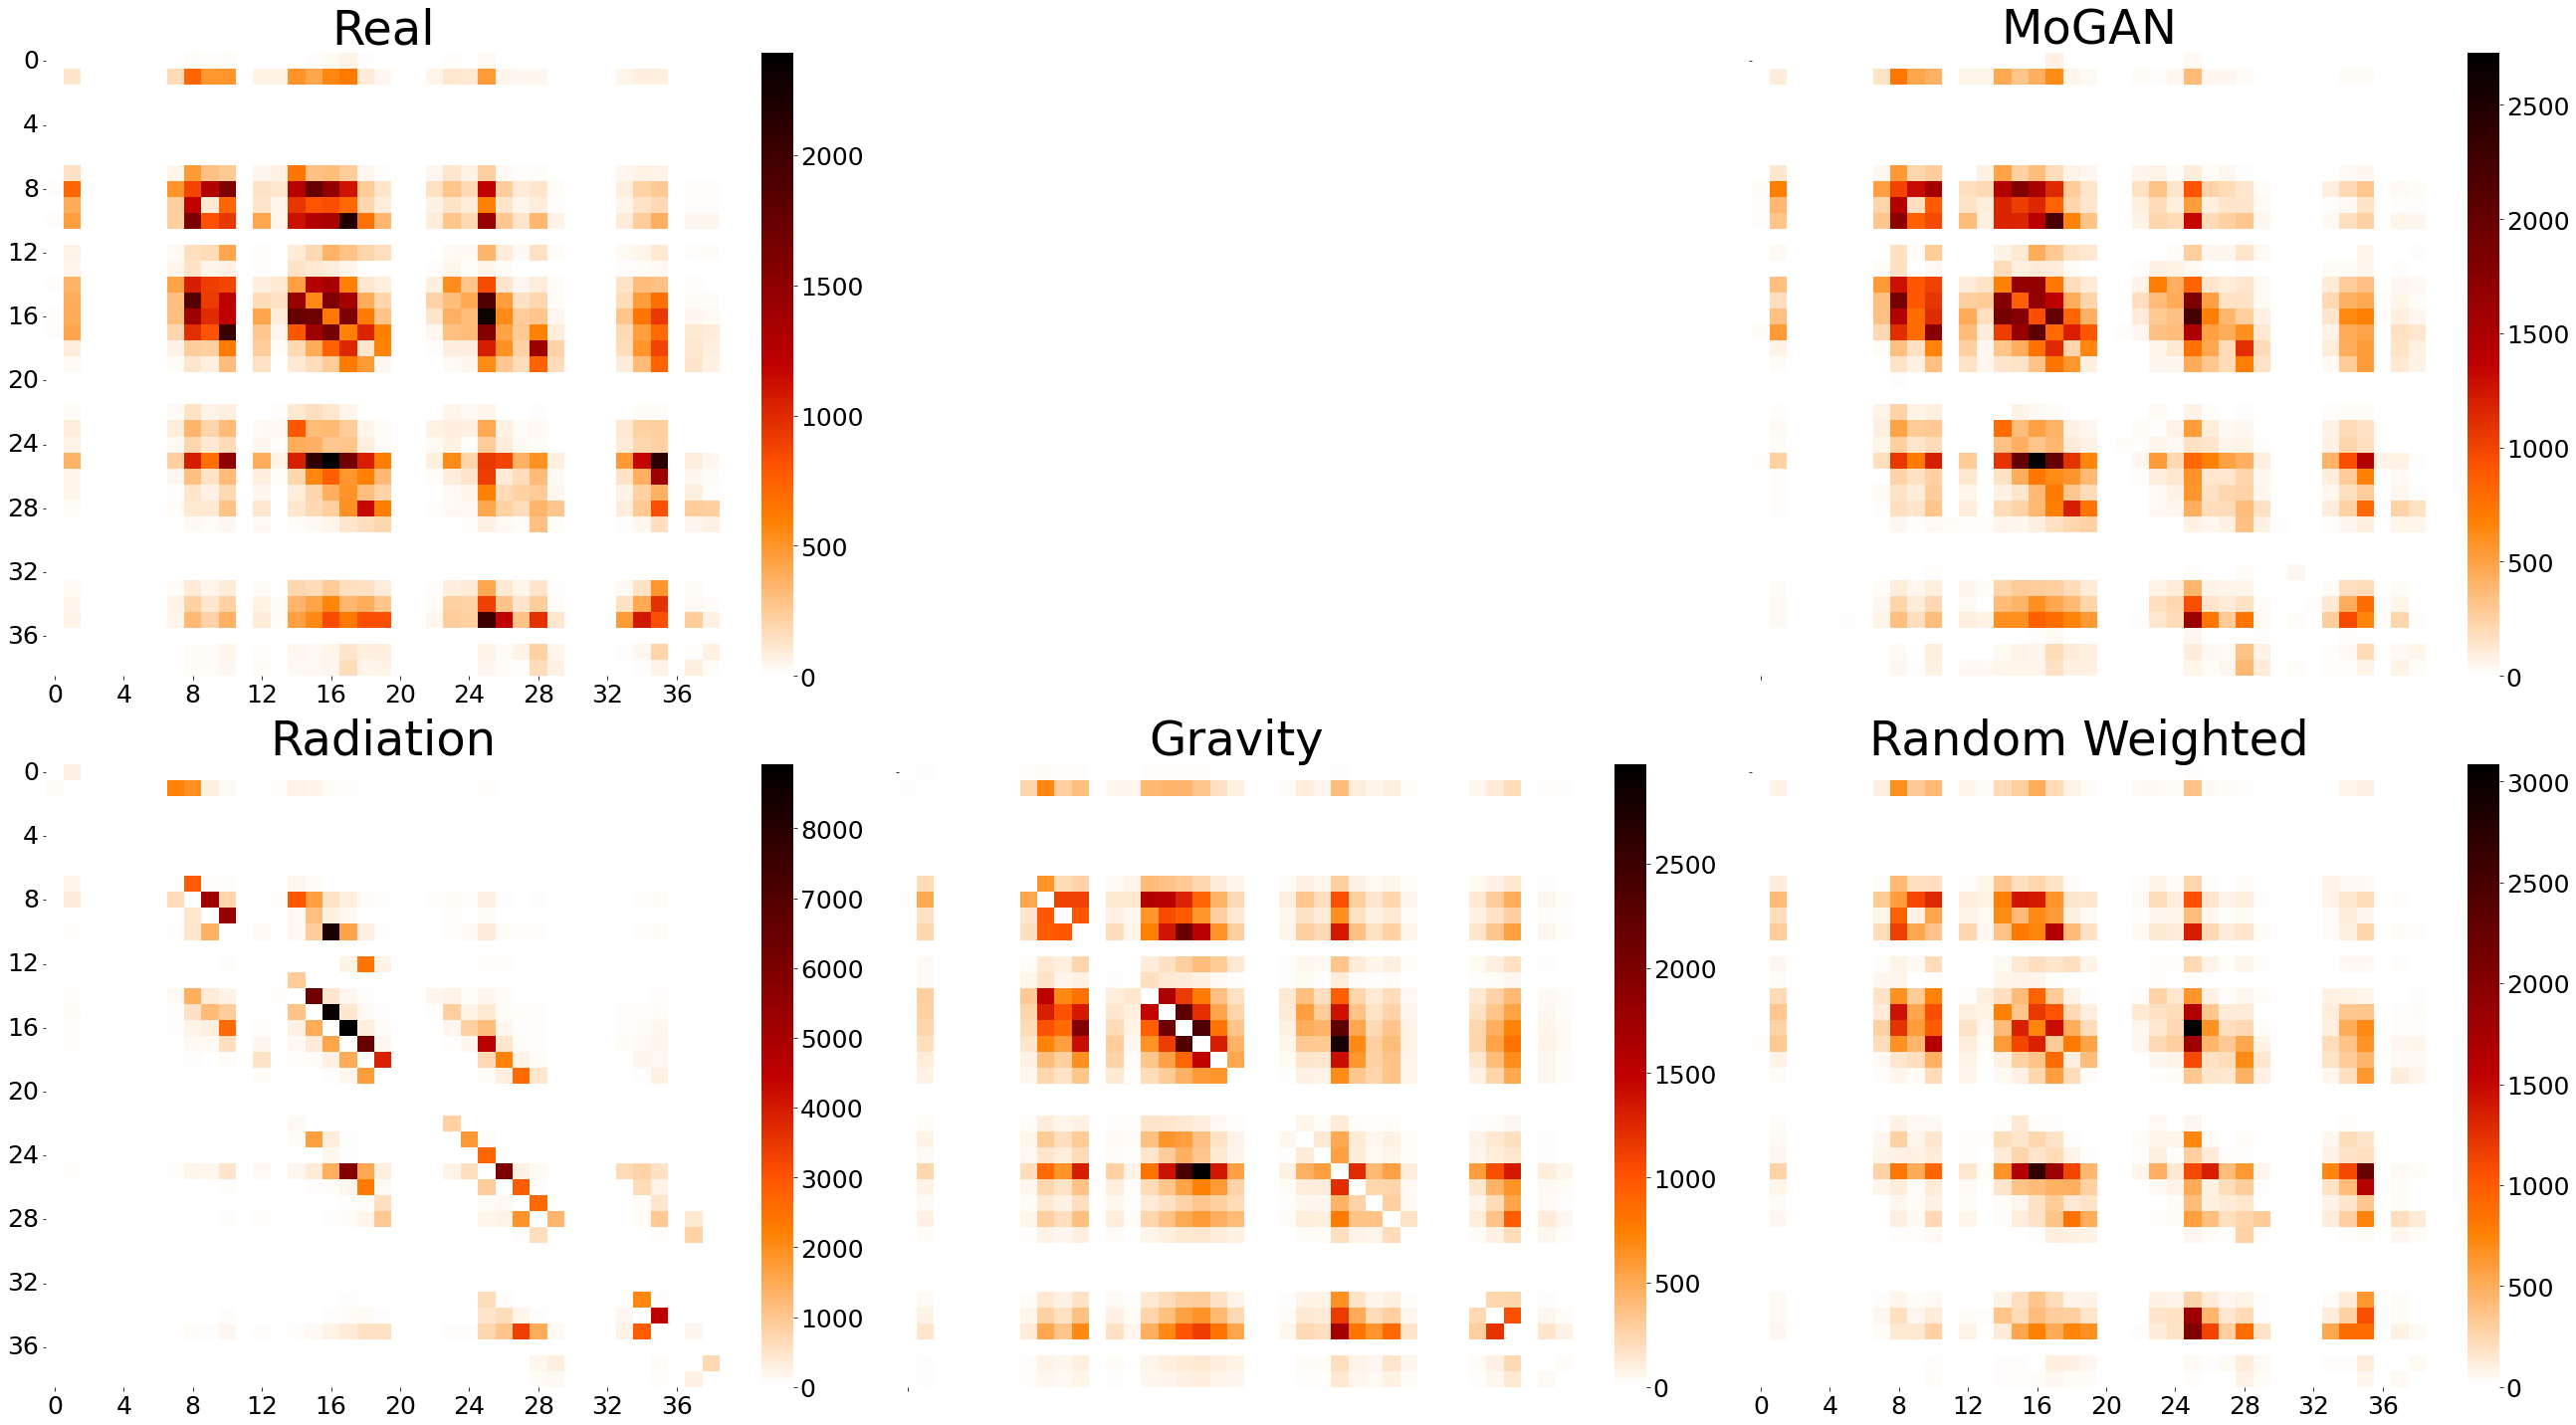

In [65]:
plt.rcParams["figure.figsize"] = [36.4, 20]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(2, 3)
fig.tight_layout()
cbar_label = 25

lw = 0.00000001
lc = "black"
lc = "#6e6464"

sns.heatmap(m0[5:44,5:44], ax=ax[0,0], cmap='gist_heat_r', xticklabels = 4, yticklabels = 4,  linecolor=lc)
ax[0,0].set_title('Real',fontsize=48)
ax[0,0].tick_params(axis='both', which='major', labelsize=25)
ax[0,0].tick_params(axis='y', rotation=0)
cbar = ax[0,0].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)

'''
sns.heatmap(m4[5:44,5:44], ax=ax[0,1], cmap='gist_heat_r', xticklabels = 4, yticklabels = [""],  linecolor=lc)
ax[0,1].set_title('Random',fontsize=48)
ax[0,1].tick_params(axis='x', which='major', labelsize=25)
cbar = ax[0,1].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)
'''

#ax[0,1].axis('off')



sns.heatmap(m1[5:44,5:44], ax=ax[0,2], cmap='gist_heat_r', xticklabels = [""], yticklabels = [""],  linecolor=lc)
ax[0,2].set_title('MoGAN',fontsize=48)
ax[0,2].tick_params(axis='x', which='major', labelsize=25)
cbar = ax[0,2].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)


sns.heatmap(m3[5:44,5:44], ax=ax[1,0], cmap='gist_heat_r', xticklabels = 4, yticklabels = 4,  linecolor=lc)
ax[1,0].set_title('Radiation',fontsize=48)
ax[1,0].tick_params(axis='both', which='major', labelsize=25)
ax[1,0].tick_params(axis='y', rotation=0)
cbar = ax[1,0].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)


sns.heatmap(m2[5:44,5:44], ax=ax[1,1], cmap='gist_heat_r', xticklabels = [""], yticklabels = [""],  linecolor=lc)
ax[1,1].set_title('Gravity',fontsize=48)
ax[1,1].tick_params(axis='x', which='major', labelsize=25)
cbar = ax[1,1].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)


sns.heatmap(m5[5:44,5:44], ax=ax[1,2], cmap='gist_heat_r', xticklabels = 4, yticklabels = [""],  linecolor=lc)
ax[1,2].set_title('Random Weighted',fontsize=48)
ax[1,2].tick_params(axis='x', which='major', labelsize=25)
cbar = ax[1,2].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)


fig.delaxes(ax[0][1])

ax[0,2].set_subplotspec

#plt.show()

plt.savefig("viz-multiple.pdf", bbox_inches='tight')

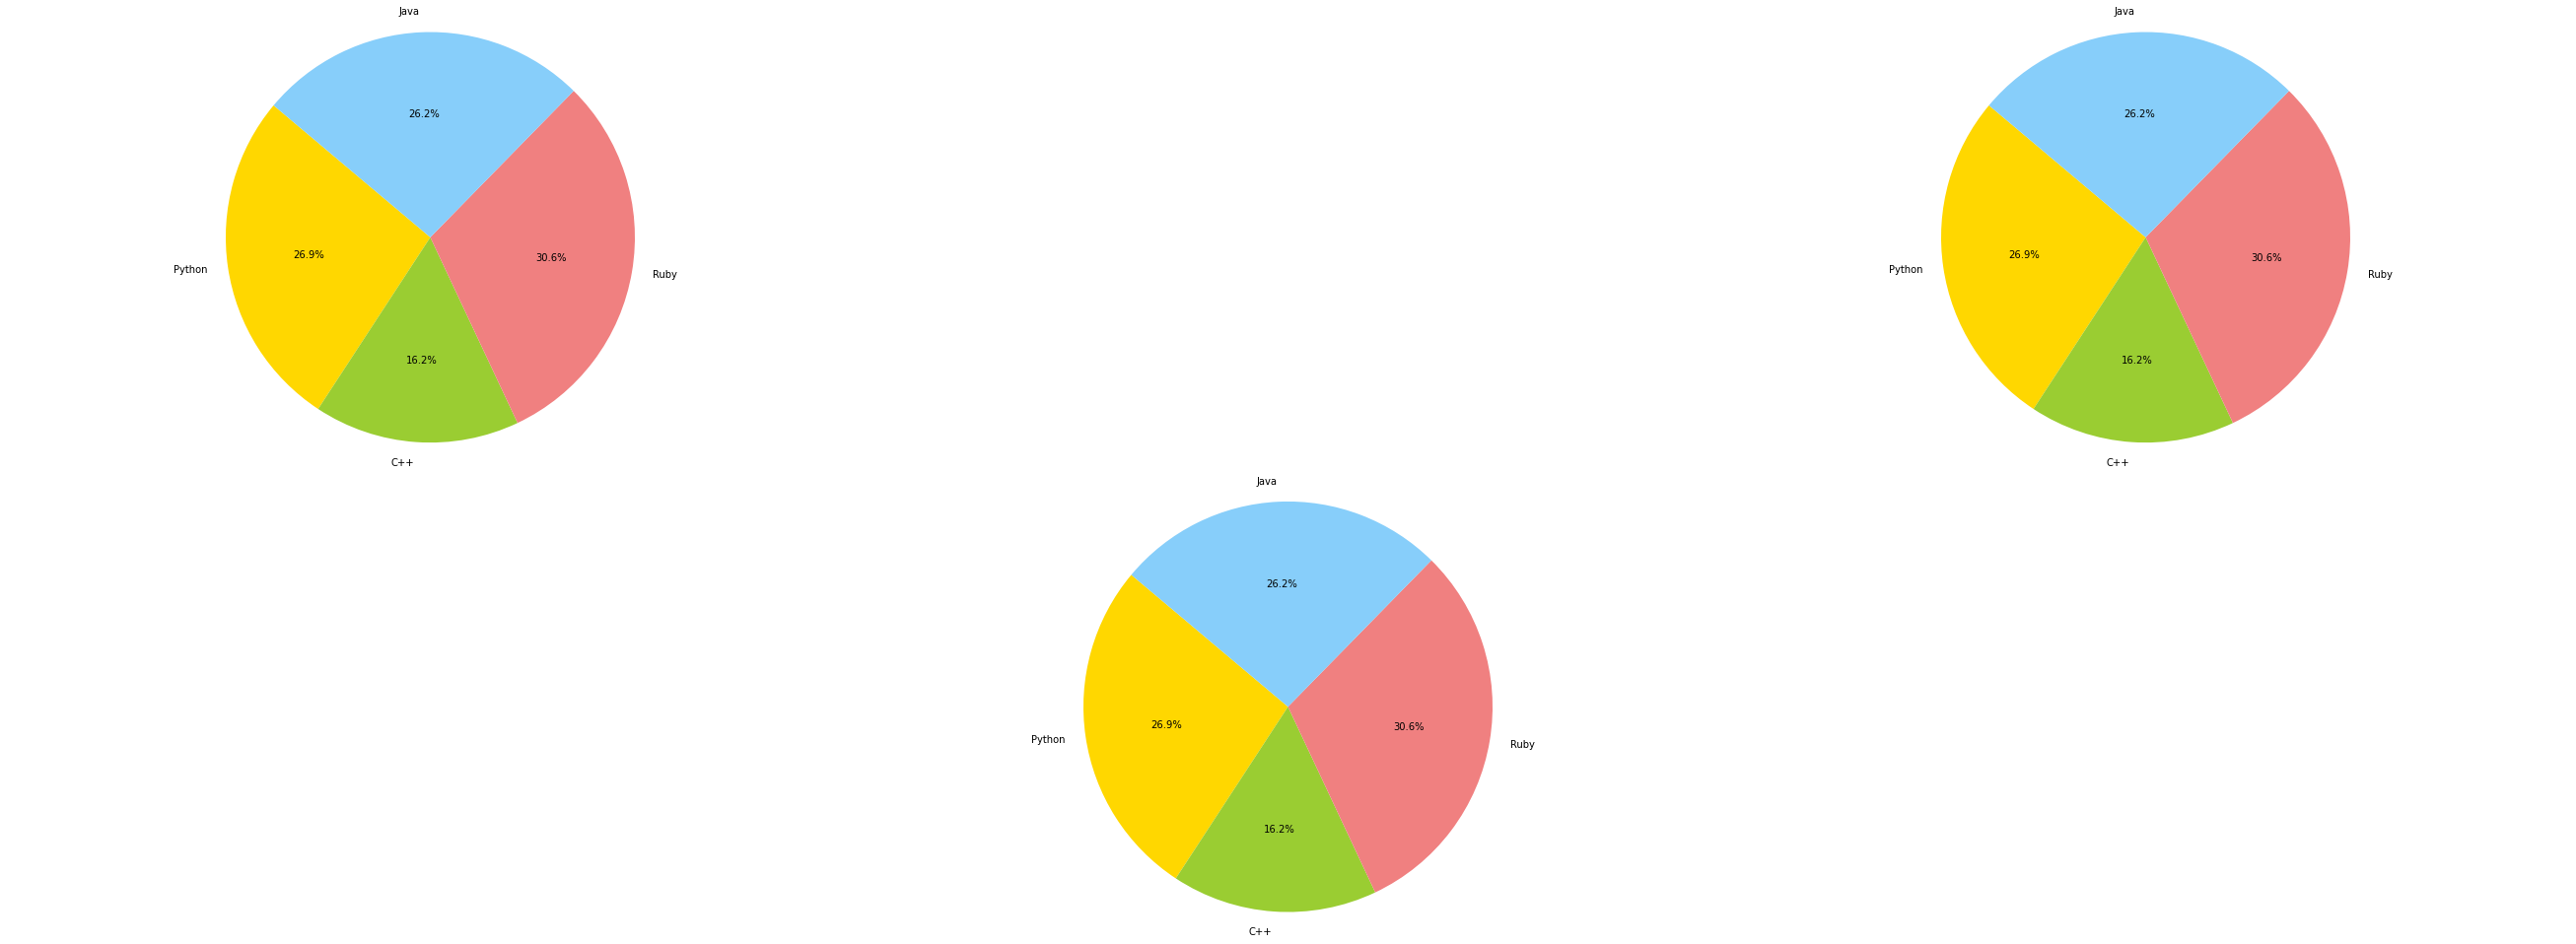

In [62]:
labels = ['Python', 'C++', 'Ruby', 'Java']
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

fig,ax = plt.subplots()

#define the position of the axes where the pie charts will be plotted
ax1 = plt.subplot2grid((3, 3), (0, 0)) # setting colspan=2 will
ax2 = plt.subplot2grid((3, 3), (0, 2))           # move top pie chart to the middle
ax3 = plt.subplot2grid((3, 3), (1, 1))

#plot the pie charts
ax1.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
ax2.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
ax3.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)

ax1.axis('equal')   #to enable to pie chart to be perfectly circular
ax2.axis('equal')
ax3.axis('equal')

plt.show()